### 1. House Prices Regression

In [1]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

### Load Data

In [2]:
# 데이터 불러오기
X_housing = pd.read_csv('X_housing.csv') 
y_housing = pd.read_csv('y_housing.csv')

X_housing.shape, y_housing.shape

((1460, 36), (1460, 1))

In [3]:
X_housing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008


In [4]:
y_housing.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


### 교차 검증

In [5]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 36), (292, 36), (1168, 1), (292, 1))

### Voting

- 하드 보팅(Hard Voting) : 각 모델의 예측 결과에서 가장 많은 표를 받은 클래스를 최종 예측 결과로 선정한다.

- 소프트 보팅(Soft Voting) : 각 클래스의 예측 확률의 평균 중 가장 높은 확률을 보이는 클래스를 선택한다.

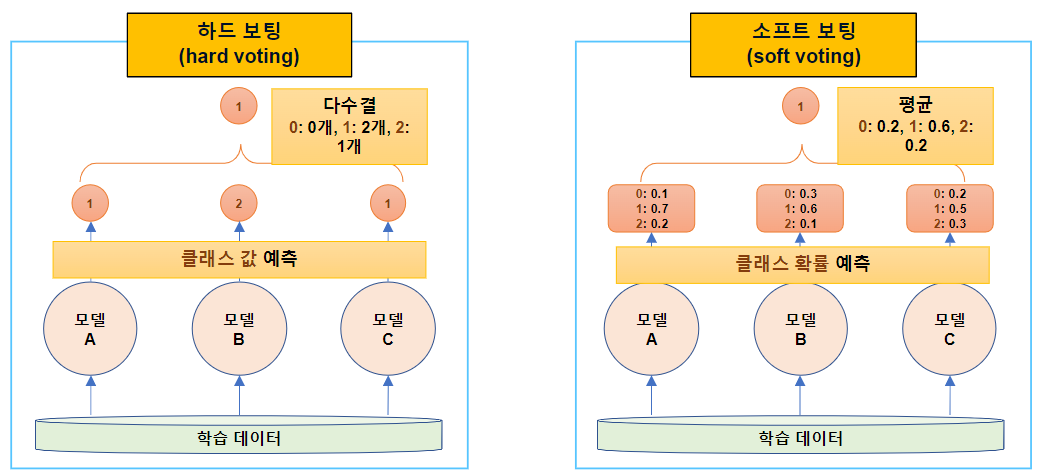

In [6]:
# 개별 모델 학습 및 평가
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 3개의 모델
lr = LinearRegression()
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    max_depth=3,
)
dt = DecisionTreeRegressor(
    random_state=42,
    max_depth=3,
)

models = [lr, rf, dt]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model.__class__.__name__}")
    print(f"Train MSE: {mean_squared_error(y_train, model.predict(X_train))}")
    print(f"Test MSE: {mse}")
    print()
    print(f"Train R2: {r2_score(y_train, model.predict(X_train))}")
    print(f"Test R2: {r2}")
    print("-"*50)

LinearRegression
Train MSE: 1151003085.240459
Test MSE: 1356492637.9490979

Train R2: 0.8070260100167439
Test R2: 0.8231505934287306
--------------------------------------------------
RandomForestRegressor
Train MSE: 1238588265.7025316
Test MSE: 1596199224.9341815

Train R2: 0.7923417211960595
Test R2: 0.7918994340242613
--------------------------------------------------
DecisionTreeRegressor
Train MSE: 1596761350.9240172
Test MSE: 1753461094.37907

Train R2: 0.7322914135590792
Test R2: 0.7713968028196675
--------------------------------------------------


In [7]:
# Voting
from sklearn.ensemble import VotingRegressor

voting = VotingRegressor(estimators=[('lr', lr), ('rf', rf), ('dt', dt)])
voting.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(max_depth=3,
                                                   random_state=42)),
                            ('dt',
                             DecisionTreeRegressor(max_depth=3,
                                                   random_state=42))])

In [8]:
# 평가
y_pred = voting.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Train MSE: {mean_squared_error(y_train, voting.predict(X_train))}")
print(f"Test MSE: {mse}")
print()
print(f"Train R2: {r2_score(y_train, voting.predict(X_train))}")
print(f"Test R2: {r2}")

Train MSE: 1037652461.0537329
Test MSE: 1276057196.3124819

Train R2: 0.8260300617841945
Test R2: 0.833637167201988


### Bagging

1. 훈련 데이터셋에서 Bootstrap 방식으로 데이터를 Random Resampling 하여 여러 개의 새로운 데이터셋을 생성한다.

    - Bootstrap 방식 : 중복을 허용하여 데이터를 샘플링하는 기법

2. 각각의 데이터셋을 사용하여 동일한 알고리즘을 독립적으로 훈련시킨다.

3. 각 모델의 예측 결과를 평균값을 구하거나 다수결을 통해 최종 결과를 얻는다.

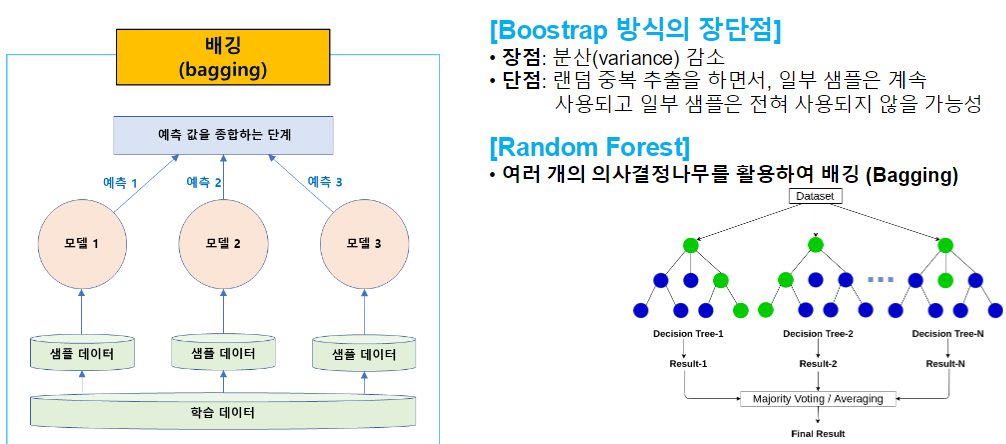

In [9]:
# Bagging
from sklearn.ensemble import BaggingRegressor # 분류의 경우 BaggingClassifier

base_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=3,
)

bagging = BaggingRegressor(
    estimator=base_model,
    n_estimators=100,
    random_state=42,
)

bagging.fit(X_train, y_train)

# 평가
y_pred = bagging.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Train MSE: {mean_squared_error(y_train, bagging.predict(X_train))}")
print(f"Test MSE: {mse}")
print()
print(f"Train R2: {r2_score(y_train, bagging.predict(X_train))}")
print(f"Test R2: {r2}")

Train MSE: 1238168714.2532723
Test MSE: 1584055070.143443

Train R2: 0.7924120620302458
Test R2: 0.793482698472566


### Boosting

- 여러 개의 성능이 약한 모델을 결합하여 성능을 높이는 앙상블 기법이다.

- 성능이 약한 모델들이 순차적으로 훈련되면서 각 단계에서 이전 모델이 잘못 예측한 샘플에 대해 새로운 모델이 더 많이 집중하고, 잘못 분류된 샘플에 더 높은 가중치를 부여한다. 따라서 이상치에 민감하다.

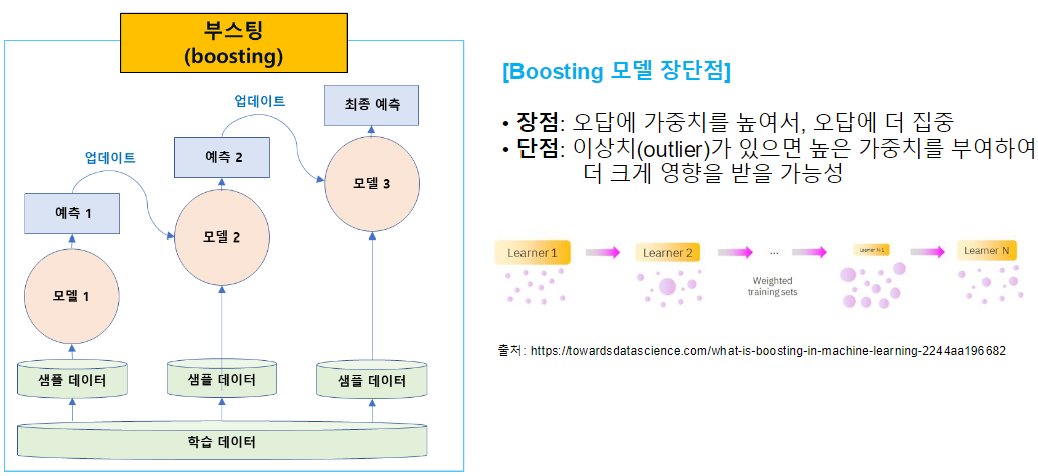

In [10]:
# boosting
from sklearn.ensemble import AdaBoostRegressor # Adaptive Boosting

base_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=3,
)

boosting = AdaBoostRegressor(
    base_model,
    n_estimators=100, # 너무 많으면 과적합이 될 수도 있다.
    random_state=42,
)

boosting.fit(X_train, y_train)

# 평가
y_pred = boosting.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Train MSE: {mean_squared_error(y_train, boosting.predict(X_train))}")
print(f"Test MSE: {mse}")
print()
print(f"Train R2: {r2_score(y_train, boosting.predict(X_train))}")
print(f"Test R2: {r2}")


Train MSE: 790604321.4229406
Test MSE: 1347337998.1040156

Train R2: 0.8674494687639203
Test R2: 0.8243441071852258


### 2. Membersip Classification

### Load Data

In [11]:
# 데이터 불러오기
X_tr_membership = pd.read_csv('X_tr_membership.csv')
X_val_membership = pd.read_csv('X_val_membership.csv')
y_tr_membership = pd.read_csv('y_tr_membership.csv')
y_val_membership = pd.read_csv('y_val_membership.csv')

X_tr_membership.shape, X_val_membership.shape, y_tr_membership.shape, y_val_membership.shape

((7045, 13), (1762, 13), (7045, 1), (1762, 1))

### Voting

In [12]:
# 개별 모델 학습 및 평가
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

lr = LogisticRegression()
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=3,
)
dt = DecisionTreeClassifier(
    random_state=42,
    max_depth=3,
)

models = [lr, rf, dt]

for model in models:
    model.fit(X_tr_membership, y_tr_membership)
    y_pred = model.predict(X_val_membership)
    
    acc = accuracy_score(y_val_membership, y_pred)
    f1 = f1_score(y_val_membership, y_pred)
    
    print(f"{model.__class__.__name__}")
    print(f"Train Accuracy: {accuracy_score(y_tr_membership, model.predict(X_tr_membership))}")
    print(f"Test Accuracy: {acc}")
    print()
    print(f"Train F1: {f1_score(y_tr_membership, model.predict(X_tr_membership))}")
    print(f"Test F1: {f1}")
    print("-"*50)

LogisticRegression
Train Accuracy: 0.694819020581973
Test Accuracy: 0.6923950056753689

Train F1: 0.036738351254480286
Test F1: 0.014545454545454545
--------------------------------------------------
RandomForestClassifier
Train Accuracy: 0.6966643009226402
Test Accuracy: 0.6969353007945517

Train F1: 0.0
Test F1: 0.0
--------------------------------------------------
DecisionTreeClassifier
Train Accuracy: 0.7017743080198723
Test Accuracy: 0.695800227014756

Train F1: 0.14279885760913913
Test F1: 0.11842105263157894
--------------------------------------------------


In [13]:
# Voting
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('lr', lr), ('rf', rf), ('dt', dt)], voting='soft')
voting.fit(X_tr_membership, y_tr_membership)

# 평가
y_pred = voting.predict(X_val_membership)

acc = accuracy_score(y_val_membership, y_pred)
f1 = f1_score(y_val_membership, y_pred)

print(f"Train Accuracy: {accuracy_score(y_tr_membership, voting.predict(X_tr_membership))}")
print(f"Test Accuracy: {acc}")
print()
print(f"Train F1: {f1_score(y_tr_membership, voting.predict(X_tr_membership))}")
print(f"Test F1: {f1}")


Train Accuracy: 0.6963804116394606
Test Accuracy: 0.6963677639046538

Train F1: 0.0009341429238673517
Test F1: 0.0


### Bagging

In [14]:
# bagging
from sklearn.ensemble import BaggingClassifier

base_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=3,
)

bagging = BaggingClassifier(
    estimator=base_model,
    n_estimators=100,
    random_state=42,
)

bagging.fit(X_tr_membership, y_tr_membership)

# 평가
y_pred = bagging.predict(X_val_membership)

acc = accuracy_score(y_val_membership, y_pred)
f1 = f1_score(y_val_membership, y_pred)

print(f"Train Accuracy: {accuracy_score(y_tr_membership, bagging.predict(X_tr_membership))}")
print(f"Test Accuracy: {acc}")
print()
print(f"Train F1: {f1_score(y_tr_membership, bagging.predict(X_tr_membership))}")
print(f"Test F1: {f1}")

Train Accuracy: 0.6970901348474096
Test Accuracy: 0.6963677639046538

Train F1: 0.014773776546629732
Test F1: 0.0074211502782931356


### Boosting

In [15]:
# boosting
from sklearn.ensemble import AdaBoostClassifier

base_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=3,
)

boosting = AdaBoostClassifier(
    base_model,
    n_estimators=100,
    random_state=42,
)

boosting.fit(X_tr_membership, y_tr_membership)

# 평가
y_pred = boosting.predict(X_val_membership)

acc = accuracy_score(y_val_membership, y_pred)
f1 = f1_score(y_val_membership, y_pred)

print(f"Train Accuracy: {accuracy_score(y_tr_membership, boosting.predict(X_tr_membership))}")
print(f"Test Accuracy: {acc}")
print()
print(f"Train F1: {f1_score(y_tr_membership, boosting.predict(X_tr_membership))}")
print(f"Test F1: {f1}")

Train Accuracy: 0.7097232079489
Test Accuracy: 0.6929625425652668

Train F1: 0.31719532554257096
Test F1: 0.285336856010568
